# Подключение библиотек и скриптов

In [449]:
import numpy as np
import pandas as pd
from scipy.stats import mode

import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [450]:
# установление размера шрифта
matplotlib.rcParams.update({'font.size': 14})

In [451]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

## Установление пути к директориям и файлам

In [452]:
TRAIN_DATASET_PATH = 'course/train.csv'
PREPARED_TRAIN_DATASET_PATH = 'course/train_prepared.csv'
TEST_DATASET_PATH = 'course/test.csv'

# Подгружаем данные

## просмотр признаков и их типов

In [453]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [454]:
train_df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [455]:
train_df.tail(10) # просмотр 10 строк с конца

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9990,15233,1,3.0,57.373889,39.688445,5.0,2,5.0,1962,0.036270,B,B,6,1318,1,200.0,1,1,B,163807.542987
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504
9992,14333,150,3.0,78.249637,49.385096,10.0,5,16.0,1976,0.300323,B,B,52,10311,6,NaN,1,9,B,342418.758888
9993,48,13,3.0,80.631333,48.899083,10.0,11,14.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,350684.628560
9994,4158,23,2.0,64.864198,NaN,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,171323.515653
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [456]:
train_df.shape # размерность датафрэйма

(10000, 20)

In [457]:
train_df.sample(frac = 0.001) # просмотр случайности части датафрэйма 0,1%

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2333,15810,2,2.0,77.437565,38.804841,12.0,13,14.0,1977,0.035145,B,B,42,9292,3,2620.0,0,3,B,505102.537965
702,8725,30,2.0,66.758407,NaN,1.0,21,21.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,186421.819592
5649,4400,1,1.0,45.264259,16.820463,11.0,9,22.0,1977,0.014581,B,B,3,760,1,NaN,0,0,B,99188.613330
4012,3666,27,1.0,47.075052,26.229078,1.0,15,15.0,2011,0.211401,B,B,9,1892,0,NaN,0,1,B,139239.461149
674,10631,88,1.0,42.571618,1.941521,1.0,6,1.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,130374.241595
2724,6498,57,2.0,62.177565,34.794601,10.0,13,22.0,2003,0.090799,B,B,74,19083,2,NaN,5,15,B,262892.374631
8161,9259,78,1.0,39.214369,20.392428,7.0,5,17.0,2004,0.092291,B,B,21,4346,2,165.0,1,2,B,216276.173725
5530,418,54,2.0,42.987519,24.179968,7.0,13,12.0,1969,0.006076,B,B,30,5285,0,645.0,6,6,B,184661.975101
1418,14830,34,3.0,83.612815,80.577260,1.0,18,25.0,2018,0.069753,B,B,53,13670,4,NaN,1,11,B,259541.908586
4975,14606,9,2.0,80.328859,NaN,1.0,4,1.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,231908.278089


In [458]:
# просмотр информации по датафрэйму
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [459]:
# точная оценка, сколько датасет занимает памяти
train_df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [460]:
# стобцы в датасете
train_df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [461]:
# Получение признака HouseYear из датасета
train_df['HouseYear']

0       1969
1       1978
2       1968
3       1977
4       1976
        ... 
9995    1968
9996    2000
9997    2015
9998    1961
9999    1990
Name: HouseYear, Length: 10000, dtype: int64

In [462]:
train_df.HouseYear

0       1969
1       1978
2       1968
3       1977
4       1976
        ... 
9995    1968
9996    2000
9997    2015
9998    1961
9999    1990
Name: HouseYear, Length: 10000, dtype: int64

In [463]:
# просмотр двух признаков датасета
train_df[['HouseYear', 'Floor']]

,HouseYear,Floor
0,1969,7
1,1978,7
2,1968,8
3,1977,8
4,1976,11
...,...,...
9995,1968,6
9996,2000,13
9997,2015,12
9998,1961,1


In [464]:
# подключение и чтение тестового датасета
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [465]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [466]:
test_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [467]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте:', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте: 5000


In [468]:
train_df.shape[1] - 1 == test_df.shape[1]

True

## Приведение типов

In [469]:
# посмотреть типы данных
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [470]:
# просмотр отдельного типа
type(train_df.HouseYear)

pandas.core.series.Series

In [471]:
train_df['Floor'].dtype

dtype('int64')

In [472]:
train_df['HouseYear'].dtype

dtype('int64')

In [473]:
# какие значения принимает признак
train_df['HouseYear'].values

array([1969, 1978, 1968, ..., 2015, 1961, 1990], dtype=int64)

In [474]:
# приведение к str
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

### Фильтрация данных с помощью булевых масок

In [475]:
train_df['LifeSquare'] > 20

0        True
1        True
2        True
3        True
4        True
        ...  
9995     True
9996     True
9997    False
9998     True
9999     True
Name: LifeSquare, Length: 10000, dtype: bool

In [476]:
# площадь больше 20 4 строки
train_df[train_df['LifeSquare'] > 20].head(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217


In [477]:
# Общая площадь больше 80 и жилая больше 20 3 строки
train_df[(train_df['Square'] > 80) & (train_df['LifeSquare'] > 20)].head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
19,4909,19,3.0,110.959792,56.996765,11.0,16,25.0,2012,0.000991,B,B,33,6783,3,NaN,1,9,B,394895.325987
20,8862,0,3.0,103.605292,47.799426,10.0,12,17.0,2002,0.319809,B,B,25,4756,16,2857.0,5,8,B,521919.057400


In [478]:
# площадь > 46 или количество комнат = 1 1 строка
train_df[(train_df['Square'] < 46) | (train_df['Rooms'] < 2)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
18,2829,57,1.0,44.513481,23.113423,8.0,6,12.0,1983,0.133215,B,B,49,11395,3,1406.0,3,4,A,183743.230464


In [479]:
~(train_df['HouseYear'] < 2014)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997     True
9998    False
9999    False
Name: HouseYear, Length: 10000, dtype: bool

In [480]:
train_df[~(train_df['HouseYear'] < 2014)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229


In [481]:
# размещение в переменную tmp куска датасета по условию
tmp = train_df[~(train_df['HouseYear'] < 2014)]
tmp.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
63,7605,6,1.0,42.505532,NaN,1.0,6,12.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,113617.219571
69,6925,27,2.0,64.929103,63.304605,10.0,15,17.0,2016,0.072158,B,B,2,629,1,NaN,0,0,A,228584.001072
71,2136,74,2.0,84.687732,81.905552,0.0,12,17.0,2017,0.075779,B,B,6,1437,3,NaN,0,2,B,243479.876105
74,4014,6,2.0,63.184422,61.142894,1.0,17,17.0,2016,0.243205,B,B,5,1564,0,540.0,0,0,B,190762.981550
76,14020,34,1.0,47.909327,42.782385,1.0,2,1.0,2016,0.069753,B,B,53,13670,4,NaN,1,11,B,181167.642404


In [482]:
tmp.shape # размер этой переменной

(1397, 20)

In [483]:
tmp.index

Int64Index([   9,   26,   28,   44,   52,   63,   69,   71,   74,   76,
            ...
            9919, 9928, 9949, 9950, 9951, 9954, 9960, 9974, 9983, 9997],
           dtype='int64', length=1397)

In [484]:
# взятие наблюдения по индексу 26
tmp.loc[26]

Id                        4378
DistrictId                  27
Rooms                      3.0
Square              106.958871
LifeSquare            0.641822
KitchenSquare              0.0
Floor                       17
HouseFloor                 0.0
HouseYear                 2018
Ecology_1             0.072158
Ecology_2                    B
Ecology_3                    B
Social_1                     2
Social_2                   629
Social_3                     1
Healthcare_1               NaN
Helthcare_2                  0
Shops_1                      0
Shops_2                      A
Price            337299.867936
Name: 26, dtype: object

In [485]:
tmp.iloc[0]

Id                       8649
DistrictId                 23
Rooms                     1.0
Square              46.461409
LifeSquare          18.915552
KitchenSquare             8.0
Floor                      13
HouseFloor               17.0
HouseYear                2014
Ecology_1            0.075779
Ecology_2                   B
Ecology_3                   B
Social_1                    6
Social_2                 1437
Social_3                    3
Healthcare_1              NaN
Helthcare_2                 0
Shops_1                     2
Shops_2                     B
Price            95380.220993
Name: 9, dtype: object

In [486]:
tmp.loc[:68]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
63,7605,6,1.0,42.505532,NaN,1.0,6,12.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,113617.219571


In [487]:
tmp.iloc[:2] # первые две проиндексированные строки tmp

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936


In [488]:
tmp.iloc[-6:-1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9951,9237,25,1.0,33.516313,31.086243,1.0,13,11.0,2015,0.069753,B,B,53,13670,4,NaN,1,11,B,148066.435795
9954,583,27,3.0,84.250710,4.187885,1.0,15,1.0,2016,0.072158,B,B,2,629,1,NaN,0,0,A,236647.781363
9960,9307,1,2.0,57.376642,NaN,0.0,8,25.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,104450.496477
9974,2159,30,1.0,33.227093,32.639166,1.0,4,4.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,65949.315881
9983,2705,6,2.0,64.311707,61.920700,1.0,12,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,164356.212221


In [489]:
# сводная таблица
pd.pivot_table(data=train_df,
               values='Floor',
               index='HouseYear',
               columns='Healthcare_1',
               aggfunc='mean')

Healthcare_1,0.0,30.0,32.0,35.0,46.0,75.0,80.0,100.0,125.0,145.0,...,2729.0,2857.0,2890.0,3300.0,3855.0,4087.0,4129.0,4508.0,4702.0,4849.0
HouseYear,,,,,,,,,,,,,,,,,,,,,
1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,4.0,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [490]:
train_df[
    (train_df.Healthcare_1 == 145.0)
    & (train_df.HouseYear == 2019)
  ]['Floor']#.mean()

610     23
1804    18
Name: Floor, dtype: int64

## Обзор количественных переменных

##### Количественные (непрерывные) переменные - это переменные, которые могут принимать любые числовые значения в некотором диапазоне

In [491]:
# выделение из датасета признаков с определенным типом данных
train_df_num_features = train_df.select_dtypes(include=['float64', 'int64'])
train_df_num_features.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [492]:
# выделение из датасета признаков исключая определенный тип данных
train_df_num_features = train_df.select_dtypes(exclude=['float64', 'int64'])
train_df_num_features.head()

,Id,DistrictId,Ecology_2,Ecology_3,Shops_2
0,14038,35,B,B,B
1,15053,41,B,B,B
2,4765,53,B,B,B
3,5809,58,B,B,B
4,10783,99,B,B,B


In [493]:
# первичное понимание
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [494]:
# Правило трех сигм - нормальное значение признака лежит в диапазоне среднее плюс-минус константа,
# умноженная на стандартное отклонение
# Можно установить персентили
train_df.describe(percentiles=[0.1*x for x in range(1, 10)])

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
10%,1.000000,36.992781,19.576757,1.000000,3.000000,4.000000,1.965000e+03,0.000991,2.000000,475.000000,0.000000,125.000000,0.000000,0.000000,118846.147305
20%,1.000000,40.397477,21.757954,1.000000,4.000000,5.000000,1.971000e+03,0.007720,5.000000,1437.000000,0.000000,240.000000,0.000000,0.000000,144036.094676
30%,1.000000,43.094156,24.427702,1.000000,5.000000,9.000000,1.977000e+03,0.034656,11.000000,2733.000000,1.000000,540.000000,0.000000,1.000000,162618.878772
40%,2.000000,46.819112,30.156068,5.000000,6.000000,12.000000,1.977000e+03,0.050756,22.000000,4386.000000,1.000000,645.000000,0.000000,2.000000,178426.852934
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
60%,2.000000,57.802530,36.148345,7.000000,9.000000,16.000000,1.981000e+03,0.118537,30.000000,5889.000000,3.000000,1084.000000,1.000000,4.000000,210345.395712


### Статистика

In [495]:
# среднее арифметическое
mean = train_df['Square'].sum() / len(train_df['Square'])
mean

56.31577519793557

In [496]:
# Дисперсия и стандартное отклонение
# Дисперсия - это показатель вариации, который представляет собой
# средний квадрат отклонений от математического ожидания
# (среднее арифметическое).
# Она выражает разброс чисел относительно среднего значения.
# Стандартное отклонение (среднеквадратичное отклонение) -
# это величина, характеризующая разброс данных относительно среднего значения.
train_df['Square'] - mean

0       -8.334214
1        9.367865
2      -11.367822
3       -2.962794
4      -16.666583
          ...    
9995    -5.913990
9996   -14.794229
9997    -8.376768
9998   -12.713214
9999   -17.649130
Name: Square, Length: 10000, dtype: float64

In [497]:
variance = np.mean((train_df['Square'] - mean) ** 2)
std = np.sqrt(variance)
variance, std

(443.4258370172112, 21.05767881361123)

In [498]:
# подсчет с помощью numpy
mean_np = np.mean(train_df['Square'])
mean_np

56.31577519793557

In [499]:
std_np = np.std(train_df['Square'])
std_np

21.05767881361123

In [500]:
# Медиана
# Медиана - значение, которая делит его на две равные части
# или же проще говоря, это середина отсортированной выборки.
np.median(np.sort(train_df['Square']))

52.51330992401352

In [501]:
# Квантили
# Квартили - это значения, которые делят выборку на 4 равные
# (по количеству объектов) части.
# Откуда следует, что второй квантиль - это медиана.
np.quantile(np.sort(train_df['Square']), 0.5)

52.51330992401352

In [502]:
np.quantile(np.sort(train_df['Square']), q=0.25)

41.774880819469836

In [503]:
np.quantile(np.sort(train_df['Square']), q=0.75)

65.90062524565681

In [504]:
# Мода
# Мода - это объект с максимальной частотой или проще говоря,
# самый популярный (частовстречаемый) объект в выборке.
mode(np.sort(train_df['Square']))

ModeResult(mode=array([1.13685878]), count=array([1]))

In [505]:
# другое представление вычисления медианы
train_df['LifeSquare'].median()

32.78126019215574

In [506]:
np.median(np.sort(train_df['LifeSquare']))

nan

In [507]:
np.median(np.sort(train_df['Square']))

52.51330992401352

In [508]:
np.median(np.sort(train_df['KitchenSquare']))

6.0

In [509]:
np.median(np.sort(train_df['Rooms']))

2.0

In [510]:
train_df['Square'].mode()

0         1.136859
1         1.988943
2         2.377248
3         2.596351
4         2.954309
           ...    
9995    212.932361
9996    275.645284
9997    409.425181
9998    604.705972
9999    641.065193
Length: 10000, dtype: float64

In [511]:
train_df['Rooms'].mode()

0    2.0
dtype: float64

In [512]:
train_df['Square'].value_counts().index

Float64Index([ 51.57650149542104, 29.648056818866337,  28.64368370695713,
              60.160707378580895,  51.97160434008474,  35.33494896234025,
               33.07180726663486,  78.43826453153252,  83.97842531638597,
               46.05381974075217,
              ...
               72.99879947962671,  44.66621035757502,  46.49445046334144,
               55.32460361383521,  63.64087851982289,  67.13359767817467,
               30.94642084283212,  86.04347612110138,  40.57075174829153,
               65.18109945993857],
             dtype='float64', length=10000)

In [513]:
train_df[train_df['Square'] == 3].shape

(0, 20)

## Обзор номинативных переменных
#### Номинативная (категориальная) переменная - тип дискретной переменной,
#### качественная (неколичественная) переменная величина

In [514]:
# Подмножество датасета, включающее признаки типа object
train_df_obj_features = train_df.select_dtypes(include='object')
train_df_obj_features.head()

,Id,DistrictId,Ecology_2,Ecology_3,Shops_2
0,14038,35,B,B,B
1,15053,41,B,B,B
2,4765,53,B,B,B
3,5809,58,B,B,B
4,10783,99,B,B,B


In [515]:
# ряд - количество уникальных строк в категориальном признаке Ecology_2
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [516]:
# ряд - количество уникальных строк в категориальном признаке Ecology_3
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [517]:
# ряд - количество уникальных строк в категориальном признаке Shops_2
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [518]:
# уникальные значения категориального признака Ecology_2
train_df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [519]:
# уникальные значения категориального признака Ecology_3
train_df['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [520]:
# уникальные значения категориального признака Shops_2
train_df['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [521]:
# число различных элементов категориального признака Ecology_2
train_df['Ecology_2'].nunique()

2

In [522]:
# число различных элементов категориального признака Ecology_3
train_df['Ecology_3'].nunique()

2

In [523]:
# число различных элементов категориального признака Shops_2
train_df['Shops_2'].nunique()

2

# 1. EDA
#### Делаем EDA для:
##### - исправления выбросов
##### - заполнения NaN
##### - идей для генераций новых фич
### Целевая переменная

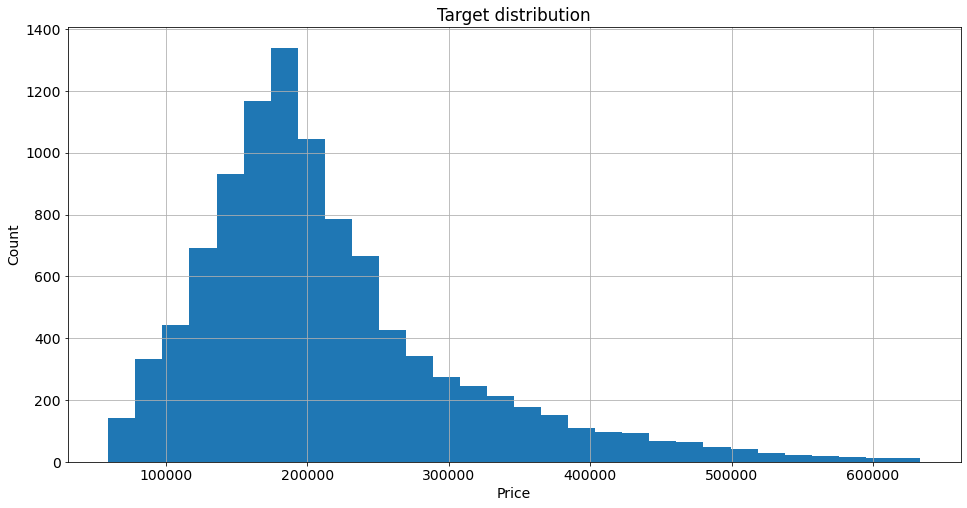

In [524]:
plt.figure(figsize = (16, 8))
train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()
# мало квартир стоимостью менее 100 000
# много квартир средней стоимости
# откос в сторону дорогостоящих кватрир
# в целом не видно выбросов

### Количественные переменные

In [525]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Номинативные переменные

In [526]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [527]:
# просмотр значений признака района
train_df['DistrictId'].value_counts()
# остальные категориальные признаки см. выше

27     851
1      652
23     565
6      511
9      294
      ... 
205      1
199      1
207      1
174      1
117      1
Name: DistrictId, Length: 205, dtype: int64

# 2. Обработка выбросов

##### Rooms

In [528]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [529]:
# убрать значения нули и больше шести,
# заводим новый признак Rooms_outlier и по всему датафръйму он будет принимать 0
train_df['Rooms_outlier'] = 0
# ставим индикатор, что если значение комнат =0 или >6, то этот признак будет =1
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1

In [530]:
# если количество комнат =0, то присваивать значение 1
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
# если количество комнат > 6, то присваивать занчение медианы
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()
# посмотрим результат
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

** Совет: в случае неизвестности использовать квантили **

##### KitchenSquare

In [531]:
# смотрим значения
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
112.0        2
51.0         2
58.0         2
37.0         2
32.0         2
41.0         2
43.0         2
30.0         2
25.0         2
39.0         1
23.0         1
123.0        1
40.0         1
48.0         1
21.0         1
72.0         1
27.0         1
63.0         1
1970.0       1
29.0         1
66.0         1
2014.0       1
31.0         1
78.0         1
35.0         1
42.0         1
73.0         1
60.0         1
84.0         1
26.0         1
54.0         1
36.0         1
53.0         1
96.0         1
62.0         1
75.0         1
Name: KitchenSquare, dtype: int64

In [532]:
# отобразим 0,975-й квантиль и 0,025-й квантиль
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [533]:
# проверяем условия:
# 1) если площадь кухни имеет пустое значение
#    и больше 0,975-го квантиля (13 кв.м),
#    то заменяем его на медиану;
# 2) если площадь кухни меньше 3 кв.м,
#    то заменяем значение на 3
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
# смотрим значения и не видим выбросов
train_df['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

##### HouseFloor, Floor

In [534]:
# посмотрим на отсортированные уникальные значения
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [535]:
# посмотрим на отсортированные уникальные значения признака Floor
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [536]:
# посмотрим сколько значений, где этаж квартиры больше этажности дома
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

In [537]:
# обработка ликвидации такой ситуации
# заведем индикатор и приравняем его нулю
train_df['HouseFloor_outlier'] = 0
# введем условие: приравнивать 1 значение индикатора, если этажность равна 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
# если этаж больше этажности, то индикатор также приравнять 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [538]:
# заменяем медианой значение этажности при равенстве его нулю
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [539]:
# другая обработка случайным образом
# берем индексы таких надписей из датафрэйма и выводим
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([   7,   14,   16,   21,   26,   35,   39,   44,   51,   67,
            ...
            9959, 9962, 9971, 9973, 9975, 9984, 9985, 9989, 9991, 9995],
           dtype='int64', length=1610)

In [540]:
# далее, для значения этажа будем прописывать такую лямбда-функцию
# случайным образом от 1 до максимума, т.е. до количества этажей в доме;
# новое значение этажа в квартире будет принимать от 1 до максимального
# количества этажей в доме, тем самым обработаем значения-выбросы
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [541]:
# проверяем количество наблюдений, где этаж квартиры больше этажности
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

##### HouseYear

In [542]:
# посмотрим варианты значений признака
train_df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
5701        2020
2493        2020
1499        2020
          ...   
7611        1916
910         1914
2656        1912
5111        1912
9317        1910
Name: HouseYear, Length: 10000, dtype: int64

In [543]:
# заменяем 2020 годом значения года постройки больше 2020
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [544]:
train_df['HouseYear'].value_counts()

1977    2652
2017     308
2016     305
2015     299
2014     210
        ... 
1910       1
1928       1
1947       1
1914       1
1916       1
Name: HouseYear, Length: 95, dtype: int64

# 3. Обработка пропусков

##### Варианты:
##### 1. Выкинуть эти данные
##### 2. Заменять пропуски разными методами (медианы, средние значения и т.д.)
##### 3. Делать/не делать дополнительную фичу
##### 4. Ничего не делать

In [545]:
# определение непустых значений (false)
train_df.isna()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9997,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [546]:
# просуммировав, получаем количество пропусков (true)
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [547]:
# посмотрим данные признаков общей площади, жилой и кухни
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,3.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,NaN,3.0
8,64.511437,NaN,3.0
9,46.461409,18.915552,8.0


##### LifeSquare

In [548]:
# заведем новый признак LifeSquare_nan и для всех пропусков приравниваем 1
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna() * 1
# пишем условие, проверяем:
# 1) значение жилой площади пусто
# 2) значения кухни и общая не пусты
condition = (train_df['LifeSquare'].isna()) \
             & (~train_df['Square'].isna()) \
             & (~train_df['KitchenSquare'].isna())
# заменяем новым значением вычитания из общей площади квартиры
# площади кухни и условных 3 кв.м хох\з.помещений
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] \
                                            - train_df.loc[condition, 'KitchenSquare'] - 3
# проверяем
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,3.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,74.312926,3.0
8,64.511437,58.511437,3.0
9,46.461409,18.915552,8.0


##### Healthcare_1

In [549]:
# можно обработать эти выбросы или выбросить их
# вопрос о корректности выбрасывания признака можно решить
# после построения графика зависимости этого признака от целевой переменной
# посмотреть насколько зависит, через сиборндисплод

In [550]:
# мы делаем drop
train_df.drop('Healthcare_1', axis=1, inplace=True)

In [551]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.887600,56.315775,40.734674,6.238200,7.404700,12.95910,1984.872400,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399,0.001200,0.182500,0.211300
std,0.811438,21.058732,77.610357,2.794717,5.036294,6.44346,18.416347,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865,0.034622,0.386275,0.408251
min,1.000000,1.136859,0.370619,3.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000
25%,1.000000,41.774881,25.285992,3.000000,3.000000,9.00000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942,0.000000,0.000000,0.000000
50%,2.000000,52.513310,35.527336,6.000000,6.000000,13.00000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879,0.000000,0.000000,0.000000
75%,2.000000,65.900625,48.706162,8.000000,11.000000,17.00000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171,0.000000,0.000000,0.000000
max,5.000000,641.065193,7480.592129,13.000000,42.000000,117.00000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000


In [552]:
# препроцессинг
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        # если вдруг встречаются пропуски, то заменять их медианой
        X.fillna(self.medians, inplace=True)
        
        return X

# 4. Построение новых признаков

##### Dummies

In [553]:
# можно использовать дамми энкодинг
# в отношении наших категориальных признаков
# по показателям экологии и наличию магазинов
# значения либо А, либо В - переводим их в вещественные признаки
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

In [554]:
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
9995,77,32,2.0,50.401785,30.476203,5.0,4,5.0,1968,0.135650,...,46,7960,6,3,11,1,196684.316040,0,1,0
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,...,30,5562,0,0,5,0,189050.289571,0,0,0
9997,5123,27,1.0,47.939008,41.939008,3.0,12,16.0,2015,0.072158,...,2,629,1,0,0,0,159143.805370,0,0,1
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,...,30,5048,9,2,5,1,181595.339808,0,0,0
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,...,27,4798,0,2,8,1,218714.077615,0,0,0


##### DistrictSize, IsDistrictLarge

In [555]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
205      1
199      1
207      1
174      1
117      1
Name: DistrictId, Length: 205, dtype: int64

In [556]:
# считаем количество квартир по районам и создаем новый датафрэйм district_size с двумя колонками
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [557]:
# преобразовываем нашу обучающую выборку функцией merge дистрикт_сайзом
# по districtid - к нашему train_df присоединяем district_size
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,7976,5,0,11,1,184966.930730,0,0,0,22
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,10309,1,1,16,1,300009.450063,0,0,0,87
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,7759,0,1,3,1,220925.908524,0,0,0,174
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,5735,3,0,5,1,175616.227217,0,0,0,179
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,5776,1,2,4,1,150226.531644,0,0,0,97


In [558]:
# определяем количество записей,
# удовлетворяющих условию: > 100
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [559]:
# создаем новый бинарный признак, который будет говорить,
# большой ли наш район
# передаем значения целочисленного типа
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,0,11,1,184966.930730,0,0,0,22,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,1,16,1,300009.450063,0,0,0,87,0
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,0,1,3,1,220925.908524,0,0,0,174,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,0,5,1,175616.227217,0,0,0,179,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2,4,1,150226.531644,0,0,0,97,0


##### MedPriceByDistrict

In [560]:
# TargetEncoding. На основе знаний о target, и его распределения
# по какой-нибудь категориальной фичи можно добавить новую переменную,
# показывающую характеристику встречаемости чисто внутри какой-то категории
# Создание (кодирование) новых признаков через целевую переменную
# Например, предположим, в разных районах квартиры имеют разную цену
# с разным количеством комнат
# группируем данные из обучающей выборки
# по номеру района и по количеству комнат,
# и берем медианное значение цены - получаем новый датафрэйм
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [561]:
# смотрим на размер нашего датафрэйма
med_price_by_district.shape

(667, 3)

In [562]:
# присобачиваем полученный датафрэйм по двум признакам
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
# видим новый признак, получившийся таргет_энкодингом,
# т.к. задействована целевая переменная
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,1,184966.930730,0,0,0,22,0,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,1,300009.450063,0,0,0,87,0,300009.450063
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,1,3,1,220925.908524,0,0,0,174,1,263206.223152
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,1,175616.227217,0,0,0,179,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,1,150226.531644,0,0,0,97,0,158539.052715


##### MedPriceByFloorYear

In [563]:
# создание нового признака - медианная цена квартиры в зависимости от этажа и года
# сначал нужно перекодировать признак этажа в категорию
# год постройки также перевести в категорию
# для этого воспользуемся следующими функциями
# при этом прописываем бины, где последний соответствует
# максимальному значению, который принимает наш признак - как последний бин
# если не прописывать labels=false - то будет определяться диапазон вхождения
# если прописывать labels=false - то будет определяться сразу категория
# max значение прописываем - в случае если в тестовых данных попадется значение
# больше, то появятся NaN, которые заполняем минус единицами
bins = [0, 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins, labels= False)

0       2
1       2
2       2
3       2
4       3
       ..
9995    1
9996    3
9997    3
9998    0
9999    2
Name: Floor, Length: 10000, dtype: int64

In [564]:
# записываем в функцию перевод признака этажа в категорию
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X

# записываем в функцию перевод признака этажа в категорию через бины
def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X

# записываем в функцию перевод признака года постройки в категорию
def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X

# записываем в функцию перевод признака года постройки в категорию через бины
def year_to_cat_pandas(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [565]:
# создаем два новых признака
train_df = year_to_cat(train_df)
train_df = floor_to_cat(train_df)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,1,184966.930730,0,0,0,22,0,207786.135836,3,3
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,300009.450063,0,0,0,87,0,300009.450063,3,3
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,1,220925.908524,0,0,0,174,1,263206.223152,3,3
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1,175616.227217,0,0,0,179,1,166809.665642,3,3
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,150226.531644,0,0,0,97,0,158539.052715,3,4


In [566]:
# создадим новый признак - медианное значение цены в зависимости
# от этажа квартиры и года постройки дома
# группируем по этим новым признакам, агрегируем,
# прописывая функцию агрегации, и переименовываем
med_price_by_floor_year = train_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,1,1,377289.553272
1,1,2,321506.277104
2,1,3,429090.881284
3,1,4,274992.472366
4,2,1,467230.539057


In [567]:
# все статистики считаются на обучающей выборке, а на тестовой применяются

In [568]:
# мерджим этот датафрэйм по двум признакам и получаем новый признак
train_df = train_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,184966.930730,0,0,0,22,0,207786.135836,3,3,191483.859755
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,300009.450063,0,0,0,87,0,300009.450063,3,3,191483.859755
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,220925.908524,0,0,0,174,1,263206.223152,3,3,191483.859755
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,175616.227217,0,0,0,179,1,166809.665642,3,3,191483.859755
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,150226.531644,0,0,0,97,0,158539.052715,3,4,183961.377700


In [569]:
# для генерации новых фич лучше прописать собственный класс
# где инициализируем класс, новые колонки заполняем пустыми значениями


In [570]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features для дамми кодировки
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID просчитываем этот признак
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True) 
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X


# 5. Отбор признаков

In [571]:
# посмотрим все признаки и запишем их в список
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'LifeSquare_nan',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [572]:
# создадим три отдельных списка, записав туда названия признаков,
# в дальнейшем, при использовании Feature Importance
# позволяют оценить важность признаков,
# можно просто убрать из листа (списка) и пересчитать
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize',
                     'new_district', 'IsDistrictLarge', 'MedPriceByFloorYear']

target_name = 'Price'

# 6. Разбиение на train и test

In [573]:
# будем разбивать train выборку на train и валидационную выборки
# подгружаем наши два датасета
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

# создаем матрицу Х, где выкидываем целевую переменную 
X = train_df.drop(columns=target_name)
# создаем y признак
y = train_df[target_name]

In [574]:
# создаем обучающую и валидационные выборки,
# по размерности 0.33, перемешиваем и фиксируем random_state
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [575]:
# тот класс, который мы вызывали - вызываем
preprocessor = DataPreprocessing()
# и делаем fit на обучающую выборку
preprocessor.fit(X_train)
# при этом обучающую выборку трансформим, валидационную и тестовую
X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)
# хороший момент проверять размерность, а именно количество признаков,
# чтобы не потерять признаки, важные для обучения модели
X_train.shape, X_valid.shape, test_df.shape

((6700, 22), (3300, 22), (5000, 22))

In [576]:
# вызываем наш класс
features_gen = FeatureGenetator()
# передаем обучающую выборку
features_gen.fit(X_train, y_train)
# трансформируем обучающую, валидационную и тестовую выборки
X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)
# проверяем увеличившееся количество признаков
X_train.shape, X_valid.shape, test_df.shape

((6700, 29), (3300, 29), (5000, 29))

In [577]:
# оставляем только прописанные выше в списках признаки
# если после обучения модели мы увидим, что какой-то признак
# перетягивает на себя одеяло, то можно его выбросить из списка,
# и обучить модели заново, посмотреть какие будут результаты
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [578]:
# смотрим, нет ли у нас выбросов в трэйне, валидации и тесте
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

# 7. построение модели

##### Обучение

In [579]:
# обучать будем RandomForest, поэтому масштабизация и нормализация признаков не понадобится
# мы не используем линейные модели
# вызываем RandomForestRegressor
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
# фитим модель, передаем обучающую выборку и обуччающую целевую переменную
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

##### Оценка модели

Train R2:	0.962
Test R2:	0.729


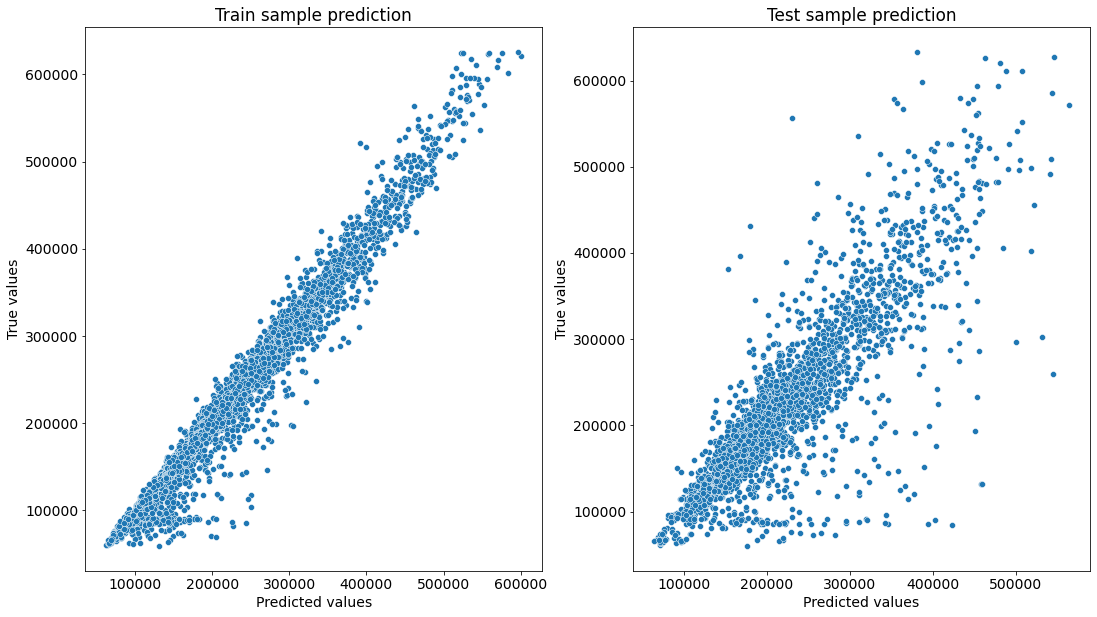

In [580]:
# предиктим на обучающей выборке - получаем предикшины
y_train_preds = rf_model.predict(X_train)
# предиктим на валидационной выборке - получаем предикшины
y_test_preds = rf_model.predict(X_valid)
# нужно получить два графика зависимостей
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

##### Кросс-валидация

In [581]:
# передаем нашу модель, обучающую выборку, метрику r2 и кросс-валидацию - разбиение на 3, перемешиваем и фиксируем random state
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.7159452 , 0.7107193 , 0.74918832])

In [582]:
# среднее также получилось выше, чем на валидационной
cv_score.mean()

0.7252842727233583

##### Важность признаков

In [583]:
# признак 23 тянет на себя одеяло и нужно его убрать
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.438137
20,DistrictSize,0.224555
12,Social_3,0.048269
7,Ecology_1,0.035894
2,LifeSquare,0.035716
11,Social_2,0.030581
23,MedPriceByFloorYear,0.029132
6,HouseYear,0.027526
5,HouseFloor,0.022562
10,Social_1,0.022124


# 8. Прогнозирование на тестовом датасете 

##### 1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
##### 2. Не потерять и не перемешать индексы от примеров при построении прогнозов
##### 3. Прогнозы должны быть для все примеров из тестового датасета (для всех строк)

In [584]:
test_df.shape

(5000, 24)

In [585]:
# считываем файл sample_submission, здесь id и какая-то цена
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,725,200000.0
1,15856,200000.0
2,5480,200000.0
3,15664,200000.0
4,14275,200000.0


In [586]:
# делаем предикшинс на тестовом датасете, вызываем нашу модель
predictions = rf_model.predict(test_df)
predictions

array([162292.33132441, 196476.70043387, 240572.6677737 , ...,
       328689.77924461, 197019.65365269, 159522.80045553])

In [587]:
# заменяем нашу колонку price предикшинами
submit['Price'] = predictions
# посмотрим значения, которые принимаем
submit.head()

,Id,Price
0,725,162292.331324
1,15856,196476.700434
2,5480,240572.667774
3,15664,339247.395988
4,14275,144033.538285


In [588]:
submit.to_csv('rf_submit.csv', index=False)

In [589]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
